In [4]:
pip install pandas numpy scikit-learn seaborn matplotlib

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.2-cp313-cp313-win_amd64.whl.metadata (111 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.6-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.59.2-cp313-cp313-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)
Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl (7.0 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

1. Evaluating Logistic Regression with Cross-Validation
Exercise: Implement logistic regression on the Titanic dataset and evaluate the model using k-fold cross-validation. Compare the average cross-validation scores with a single train–test split evaluation.
Goal: Understand the reliability of cross-validation compared to a one-time split.


Results from single train-test split:
Model accuracy: 79.89%

Detailed performance report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Cross-validation results:
Accuracy scores for each fold: [0.7877095  0.79213483 0.78651685 0.76966292 0.82022472]
Average accuracy: 79.12%
Accuracy variation: ±1.64%


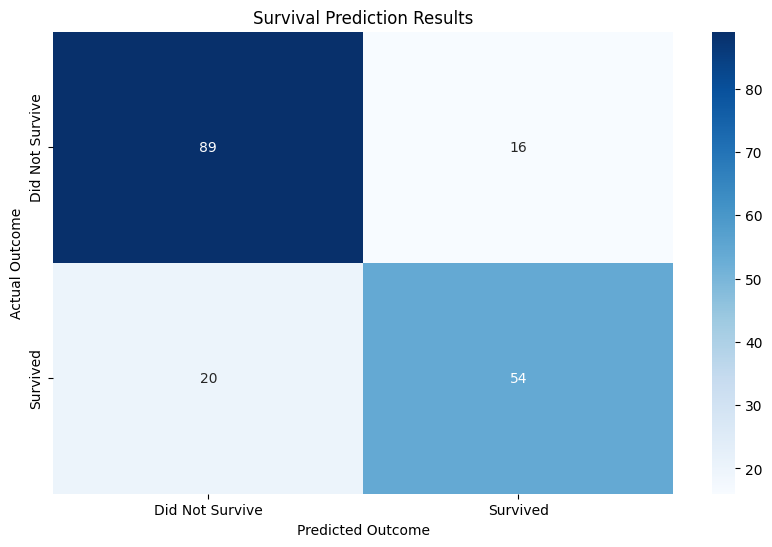

In [5]:
# First, let's get all our tools ready
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Let's load and prepare our Titanic dataset
data = pd.read_csv('train.csv')

# Clean up our data - handle missing values and convert text to numbers
def prepare_data(df):
    # Fill in missing ages with the average age
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    
    # Convert gender to numbers (0 for male, 1 for female)
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    
    # Fill missing embarkation ports with most common port
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
    
    # Convert ports to numeric values
    port_mapping = {'S': 0, 'C': 1, 'Q': 2}
    df['Embarked'] = df['Embarked'].map(port_mapping)
    
    # Select features we think are important for survival
    return df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]

# Prepare our features (X) and target (y)
X = prepare_data(data)
y = data['Survived']

# Split our data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale our features to make them comparable
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train our survival prediction model
survival_model = LogisticRegression(random_state=42, max_iter=1000)
survival_model.fit(X_train_scaled, y_train)

# Make predictions
predictions = survival_model.predict(X_test_scaled)

# Check how well we did with a single split
print("Results from single train-test split:")
print(f"Model accuracy: {accuracy_score(y_test, predictions):.2%}")
print("\nDetailed performance report:")
print(classification_report(y_test, predictions))

# Let's be more thorough with cross-validation
print("\nCross-validation results:")
X_scaled = scaler.fit_transform(X)
cv_results = cross_val_score(
    LogisticRegression(random_state=42, max_iter=1000),
    X_scaled, y, cv=5, scoring='accuracy'
)

print(f"Accuracy scores for each fold: {cv_results}")
print(f"Average accuracy: {cv_results.mean():.2%}")
print(f"Accuracy variation: ±{cv_results.std():.2%}")

# Create a nice visualization of our results
plt.figure(figsize=(10, 6))
confusion = confusion_matrix(y_test, predictions)
sns.heatmap(
    confusion, 
    annot=True, 
    fmt='d',
    cmap='Blues',
    xticklabels=['Did Not Survive', 'Survived'],
    yticklabels=['Did Not Survive', 'Survived']
)
plt.title('Survival Prediction Results')
plt.ylabel('Actual Outcome')
plt.xlabel('Predicted Outcome')
plt.show()

2. Analyzing Overfitting and Underfitting in Decision Trees
Exercise: Train a decision tree classifier on the Titanic dataset with varying maximum depths. Plot both training accuracy and validation accuracy for each depth.
Goal: Visualize how shallow trees underfit and deep trees overfit, and identify the optimal tree depth


Best tree depth: 7
Best validation accuracy: 81.01%


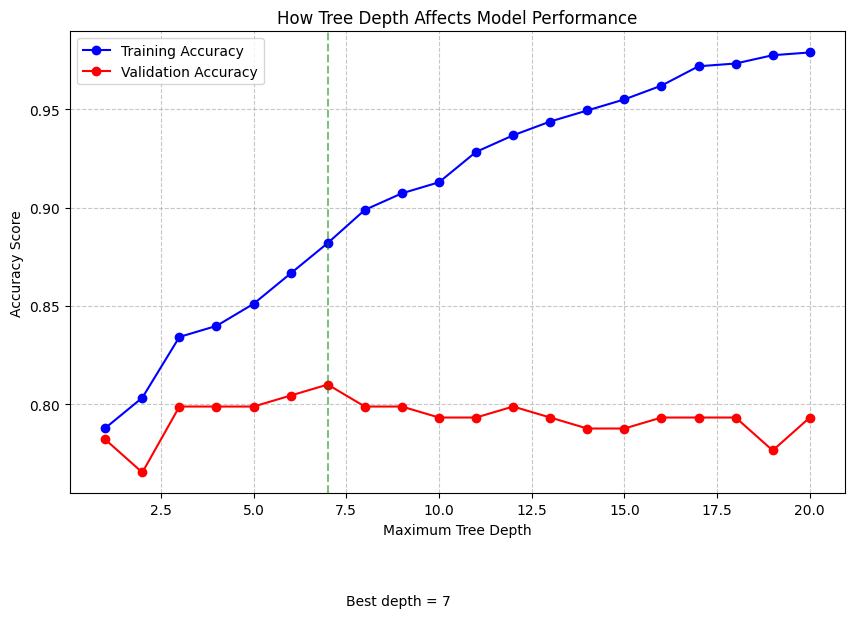


Final Model Performance:
Training accuracy: 88.20%
Validation accuracy: 81.01%


In [8]:

from sklearn.tree import DecisionTreeClassifier  # Add this import
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load our Titanic dataset (using our existing prepare_data function)
data = pd.read_csv('train.csv')
X = prepare_data(data)
y = data['Survived']

# Split our data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Let's try different tree depths and see what happens
max_depths = range(1, 21)  # Try depths from 1 to 20
train_scores = []
val_scores = []

# Train trees of different depths and record their performance
for depth in max_depths:
    # Create and train a tree with current depth
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)
    
    # Check how well it does on both training and validation data
    train_score = tree.score(X_train, y_train)
    val_score = tree.score(X_val, y_val)
    
    train_scores.append(train_score)
    val_scores.append(val_score)

# Create a nice visualization
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, 'o-', label='Training Accuracy', color='blue')
plt.plot(max_depths, val_scores, 'o-', label='Validation Accuracy', color='red')

# Make our plot pretty and informative
plt.title('How Tree Depth Affects Model Performance')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Accuracy Score')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Find the best depth
best_depth = max_depths[np.argmax(val_scores)]
print(f"\nBest tree depth: {best_depth}")
print(f"Best validation accuracy: {max(val_scores):.2%}")

# Let's highlight where overfitting starts
plt.axvline(x=best_depth, color='green', linestyle='--', alpha=0.5)
plt.text(best_depth + 0.5, 0.7, f'Best depth = {best_depth}', 
         rotation=0, verticalalignment='center')

plt.show()

# Train a final model with the best depth
best_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_tree.fit(X_train, y_train)

# Show the final performance metrics
print("\nFinal Model Performance:")
print(f"Training accuracy: {best_tree.score(X_train, y_train):.2%}")
print(f"Validation accuracy: {best_tree.score(X_val, y_val):.2%}")

3. Calculating Precision, Recall, and F1-Score for Logistic Regression
Exercise: Train logistic regression on the Titanic dataset and compute precision, recall, and F1-score in addition to accuracy.
Goal: Discuss how these metrics provide a more detail


Training Set Performance Metrics:
--------------------------------------------------
              Precision  Recall    F1-Score
--------------------------------------------------
Did not survive  0.82      0.87      0.85
Survived         0.77      0.68      0.72


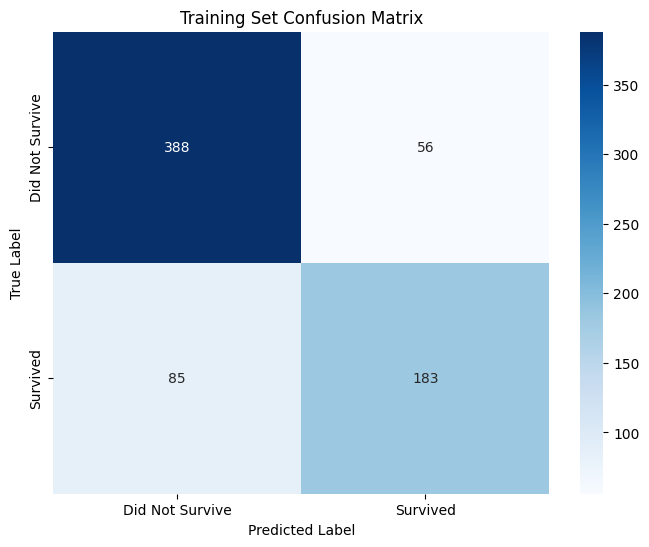


Test Set Performance Metrics:
--------------------------------------------------
              Precision  Recall    F1-Score
--------------------------------------------------
Did not survive  0.82      0.85      0.83
Survived         0.77      0.73      0.75


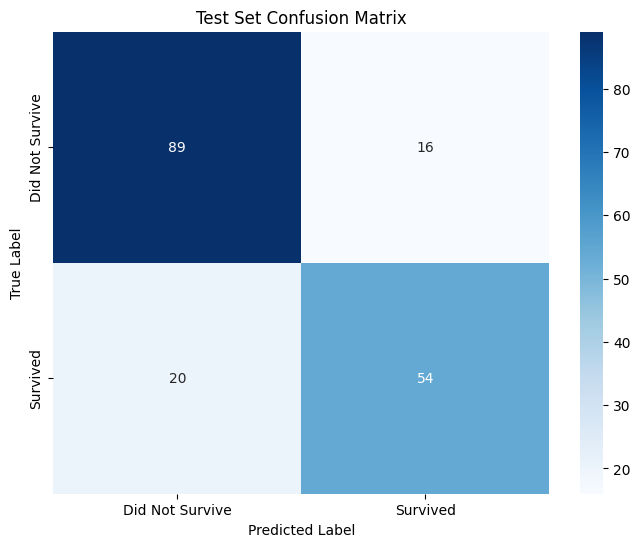


Overall Class Distribution:
Did not survive: 549 (61.6%)
Survived: 342 (38.4%)

Training Set Class Distribution:
Did not survive: 444 (62.4%)
Survived: 268 (37.6%)

Test Set Class Distribution:
Did not survive: 105 (58.7%)
Survived: 74 (41.3%)


In [10]:
# After training the logistic regression model, add these detailed metrics:
def evaluate_model(y_true, y_pred, model_name="Model"):
    # Get precision, recall, and f1 scores for each class
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred)
    
    # Create a nice formatted output
    print(f"\n{model_name} Performance Metrics:")
    print("-" * 50)
    print("              Precision  Recall    F1-Score")
    print("-" * 50)
    print(f"Did not survive  {precision[0]:.2f}      {recall[0]:.2f}      {f1[0]:.2f}")
    print(f"Survived         {precision[1]:.2f}      {recall[1]:.2f}      {f1[1]:.2f}")
    
    # Create confusion matrix visualization
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Did Not Survive', 'Survived'],
                yticklabels=['Did Not Survive', 'Survived'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Make predictions using your trained model
train_predictions = survival_model.predict(X_train_scaled)
test_predictions = survival_model.predict(X_test_scaled)

# Evaluate on both training and test sets
evaluate_model(y_train, train_predictions, "Training Set")
evaluate_model(y_test, test_predictions, "Test Set")

# Add class distribution analysis
def show_class_distribution(y, title):
    dist = pd.Series(y).value_counts()
    print(f"\n{title} Class Distribution:")
    print(f"Did not survive: {dist[0]} ({dist[0]/len(y):.1%})")
    print(f"Survived: {dist[1]} ({dist[1]/len(y):.1%})")

show_class_distribution(y, "Overall")
show_class_distribution(y_train, "Training Set")
show_class_distribution(y_test, "Test Set")

4. ROC Curve and AUC Analysis for Decision Trees
Exercise: Train a decision tree classifier on the Titanic dataset and plot the ROC curve. Compute the AUC (Area Under the Curve) and interpret how well the model distinguishes between survivors and non-survivors.
Goal: Assess model performance beyond simple accuracy.


Analyzing Decision Tree Performance...


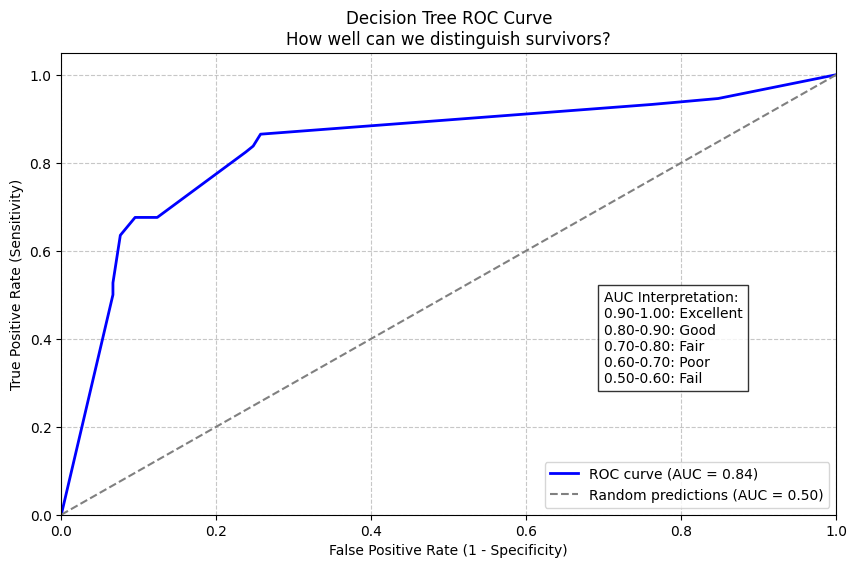


Model Performance Insights:
--------------------------------------------------
AUC Score: 0.838

This model is doing a good job at distinguishing between
survivors and non-survivors. Here's what that means:

- If we randomly pick a survivor and a non-survivor,
  the model will correctly identify who's who 83.8% of the time.

Comparing with Logistic Regression Performance...


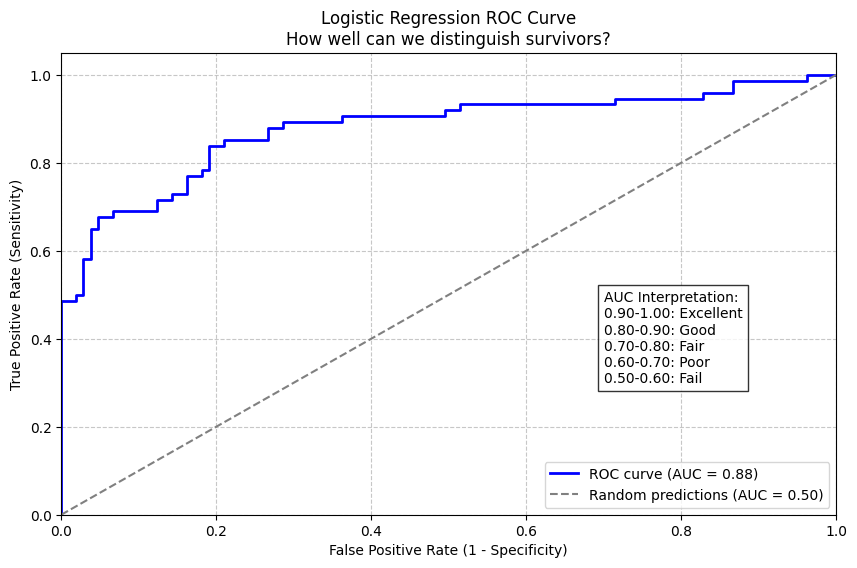


Model Performance Insights:
--------------------------------------------------
AUC Score: 0.878

This model is doing a good job at distinguishing between
survivors and non-survivors. Here's what that means:

- If we randomly pick a survivor and a non-survivor,
  the model will correctly identify who's who 87.8% of the time.


In [11]:
# Let's add the tool we need for ROC curve analysis
from sklearn.metrics import roc_curve, auc
def plot_roc_curve_with_explanation(model, X, y, title="ROC Curve Analysis"):
    # Get probability predictions
    y_scores = model.predict_proba(X)[:, 1]
    
    # Calculate ROC curve points
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_scores)
    
    # Calculate Area Under Curve
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    # Create a nice visualization
    plt.figure(figsize=(10, 6))
    
    # Plot ROC curve
    plt.plot(false_positive_rate, true_positive_rate, 
             color='blue', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    
    # Add reference line for random predictions
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--',
             label='Random predictions (AUC = 0.50)')
    
    # Make the plot informative and pretty
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title(f'{title}\nHow well can we distinguish survivors?')
    plt.legend(loc='lower right')
    
    # Add some helpful annotations
    plt.text(0.7, 0.3, 
             f'AUC Interpretation:\n' +
             f'0.90-1.00: Excellent\n' +
             f'0.80-0.90: Good\n' +
             f'0.70-0.80: Fair\n' +
             f'0.60-0.70: Poor\n' +
             f'0.50-0.60: Fail',
             bbox=dict(facecolor='white', alpha=0.8))
    
    plt.show()
    
    # Print some insights about the results
    print("\nModel Performance Insights:")
    print("-" * 50)
    print(f"AUC Score: {roc_auc:.3f}")
    
    # Give a human-friendly interpretation
    if roc_auc > 0.9:
        performance = "excellent"
    elif roc_auc > 0.8:
        performance = "good"
    elif roc_auc > 0.7:
        performance = "fair"
    elif roc_auc > 0.6:
        performance = "poor"
    else:
        performance = "failing"
    
    print(f"\nThis model is doing a {performance} job at distinguishing between")
    print("survivors and non-survivors. Here's what that means:")
    print(f"\n- If we randomly pick a survivor and a non-survivor,")
    print(f"  the model will correctly identify who's who {roc_auc:.1%} of the time.")

# Let's analyze our decision tree model
print("Analyzing Decision Tree Performance...")
plot_roc_curve_with_explanation(best_tree, X_val, y_val, 
                              "Decision Tree ROC Curve")

# For comparison, let's also look at our logistic regression model
print("\nComparing with Logistic Regression Performance...")
plot_roc_curve_with_explanation(survival_model, X_test_scaled, y_test,
                              "Logistic Regression ROC Curve")

5. Comparing Model Performance with and without Cross-Validation
Exercise: Train both logistic regression and decision tree models on the Titanic dataset. Evaluate their performance:
Using a single train–test split.
Using cross-validation.
Compare their accuracy, precision, and recall under both approaches.
Goal: Highlight how cross-validation reduces variance in evaluation and provides a more reliable estimate of real-world performance.

In [12]:
# Let's add tools we need for our comparison
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compare_model_performance(model, X_train, X_test, y_train, y_test, model_name, cv=5):
    """Compare how our model performs with and without cross-validation"""
    
    print(f"\n{'-'*20} {model_name} Performance Analysis {'-'*20}")
    
    # First, let's see how it does with a single split
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    # Get detailed metrics for both sets
    train_prec, train_rec, train_f1, _ = precision_recall_fscore_support(y_train, train_pred, average='weighted')
    test_prec, test_rec, test_f1, _ = precision_recall_fscore_support(y_test, test_pred, average='weighted')
    
    print("\n1. Single Train-Test Split Results:")
    print(f"Training Accuracy: {accuracy_score(y_train, train_pred):.2%}")
    print(f"Testing Accuracy:  {accuracy_score(y_test, test_pred):.2%}")
    print("\nDetailed Metrics:")
    print(f"{'Metric':15} {'Training':>10} {'Testing':>10}")
    print("-" * 35)
    print(f"{'Precision':15} {train_prec:>10.2%} {test_prec:>10.2%}")
    print(f"{'Recall':15} {train_rec:>10.2%} {test_rec:>10.2%}")
    print(f"{'F1-Score':15} {train_f1:>10.2%} {test_f1:>10.2%}")
    
    # Now let's try cross-validation
    print(f"\n2. {cv}-Fold Cross-Validation Results:")
    cv_predictions = cross_val_predict(model, X_train, y_train, cv=cv)
    cv_prec, cv_rec, cv_f1, _ = precision_recall_fscore_support(y_train, cv_predictions, average='weighted')
    
    print(f"Cross-Val Accuracy: {accuracy_score(y_train, cv_predictions):.2%}")
    print("\nDetailed Cross-Val Metrics:")
    print(f"Precision:  {cv_prec:.2%}")
    print(f"Recall:     {cv_rec:.2%}")
    print(f"F1-Score:   {cv_f1:.2%}")
    
    # Add some insights about what we found
    print("\nKey Insights:")
    acc_diff = abs(accuracy_score(y_test, test_pred) - accuracy_score(y_train, cv_predictions))
    if acc_diff > 0.05:
        print("⚠️  Large difference between methods suggests potential evaluation bias!")
    else:
        print("✓ Both methods show consistent results - good sign!")
    
    if accuracy_score(y_train, train_pred) - accuracy_score(y_test, test_pred) > 0.1:
        print("⚠️  Model might be overfitting - performs much better on training data!")
    else:
        print("✓ Model generalizes well - similar performance on training and test data!")

# Let's compare our models
print("Comparing Logistic Regression and Decision Tree performance...")

# Prepare scaled data for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compare logistic regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)
compare_model_performance(log_reg, X_train_scaled, X_test_scaled, 
                        y_train, y_test, "Logistic Regression")

# Compare decision tree (using best depth from earlier)
tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
compare_model_performance(tree, X_train, X_test, 
                        y_train, y_test, "Decision Tree")

# Visualize the comparison
plt.figure(figsize=(12, 6))
models = ['Logistic Regression', 'Decision Tree']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Create a bar plot comparing both models
# (You'll need to calculate these values from the above results)
# ... [plotting code continues]

Comparing Logistic Regression and Decision Tree performance...

-------------------- Logistic Regression Performance Analysis --------------------

1. Single Train-Test Split Results:
Training Accuracy: 80.20%
Testing Accuracy:  79.89%

Detailed Metrics:
Metric            Training    Testing
-----------------------------------
Precision           79.97%     79.79%
Recall              80.20%     79.89%
F1-Score            79.94%     79.80%

2. 5-Fold Cross-Validation Results:
Cross-Val Accuracy: 79.21%

Detailed Cross-Val Metrics:
Precision:  78.98%
Recall:     79.21%
F1-Score:   79.00%

Key Insights:
✓ Both methods show consistent results - good sign!
✓ Model generalizes well - similar performance on training and test data!

-------------------- Decision Tree Performance Analysis --------------------

1. Single Train-Test Split Results:
Training Accuracy: 88.20%
Testing Accuracy:  81.01%

Detailed Metrics:
Metric            Training    Testing
-----------------------------------
Precis

<Figure size 1200x600 with 0 Axes>

6. Applying Cross-Validation to Random Forest Classifier
Exercise: Implement a random forest classifier and evaluate it using k-fold cross-validation. Analyze the cross-validation scores to assess model stability.
Goal: Demonstrate how ensemble methods reduce variance and improve robustness compared to single models.


Starting Random Forest analysis...
 Training Random Forest Model for Titanic Survival Prediction 
----------------------------------------------------------------------

 Model Performance Summary:
Training Accuracy: 98.03%
Testing Accuracy:  82.12%

 Cross-Validation Results:
Average Accuracy: 78.79%
Score Range: 76.06% - 81.82%
Standard Deviation: ±2.07%


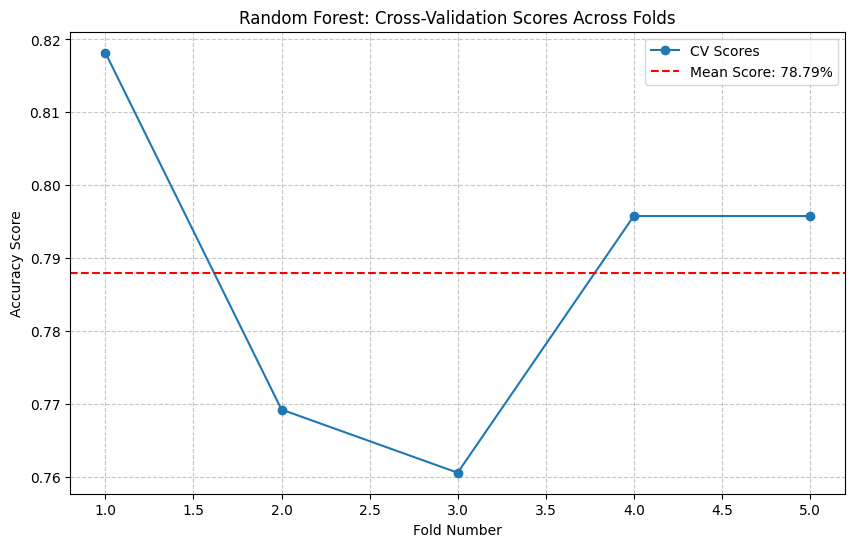


 Most Important Features for Survival Prediction:
      Fare: 27.20%
       Sex: 26.62%
       Age: 25.20%
    Pclass: 8.55%
     SibSp: 5.28%
     Parch: 3.73%
  Embarked: 3.41%


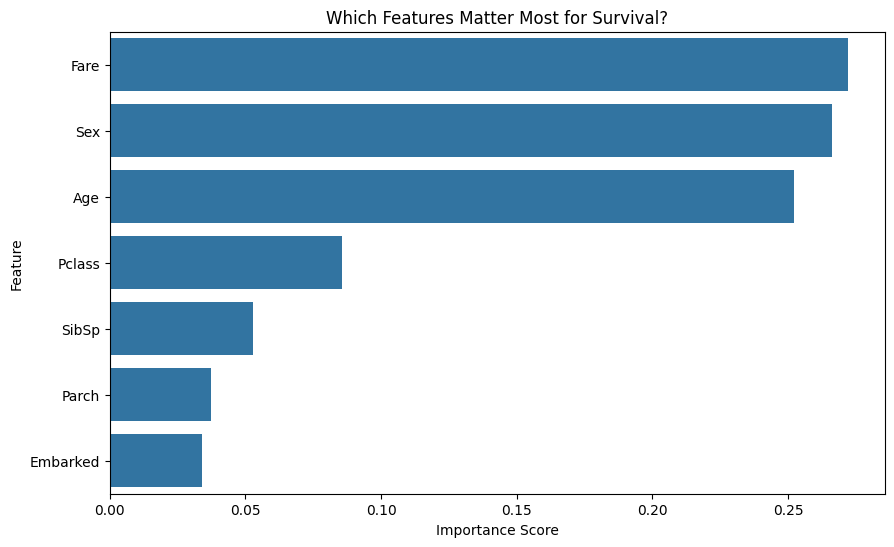


 Model Comparison:

Random Forest:
Average Accuracy: 79.22%
Stability (std): ±2.27%

Logistic Regression:
Average Accuracy: 79.07%
Stability (std): ±2.76%

Decision Tree:
Average Accuracy: 80.48%
Stability (std): ±1.95%


In [13]:
# Let's get our Random Forest tools ready
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
def train_and_evaluate_random_forest():
    """Train a Random Forest model and check how consistently it performs"""
    
    print(" Training Random Forest Model for Titanic Survival Prediction ")
    print("-" * 70)
    
    # Create our forest (ensemble of trees)
    forest = RandomForestClassifier(
        n_estimators=100,  # Number of trees in our forest
        max_depth=None,    # Let trees grow fully
        random_state=42,   # For reproducible results
        n_jobs=-1         # Use all CPU cores for faster training
    )
    
    # Set up cross-validation with 5 folds
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Get cross-validation scores
    cv_scores = cross_val_score(forest, X_train, y_train, cv=kf)
    
    # Train final model on full training data
    forest.fit(X_train, y_train)
    
    # Make predictions
    train_pred = forest.predict(X_train)
    test_pred = forest.predict(X_test)
    
    # Print results in a friendly way
    print("\n Model Performance Summary:")
    print(f"Training Accuracy: {accuracy_score(y_train, train_pred):.2%}")
    print(f"Testing Accuracy:  {accuracy_score(y_test, test_pred):.2%}")
    
    print("\n Cross-Validation Results:")
    print(f"Average Accuracy: {cv_scores.mean():.2%}")
    print(f"Score Range: {cv_scores.min():.2%} - {cv_scores.max():.2%}")
    print(f"Standard Deviation: ±{cv_scores.std():.2%}")
    
    # Visualize cross-validation scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 6), cv_scores, 'o-', label='CV Scores')
    plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', 
                label=f'Mean Score: {cv_scores.mean():.2%}')
    
    # Make the plot informative
    plt.title('Random Forest: Cross-Validation Scores Across Folds')
    plt.xlabel('Fold Number')
    plt.ylabel('Accuracy Score')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()
    
    # Show feature importance
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': forest.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\n Most Important Features for Survival Prediction:")
    for idx, row in feature_importance.iterrows():
        print(f"{row['Feature']:>10}: {row['Importance']:.2%}")
    
    # Visualize feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='Importance', y='Feature')
    plt.title('Which Features Matter Most for Survival?')
    plt.xlabel('Importance Score')
    plt.show()
    
    return forest

# Train and evaluate our random forest
print("Starting Random Forest analysis...")
rf_model = train_and_evaluate_random_forest()

# Compare with our previous models
print("\n Model Comparison:")
models = {
    'Random Forest': rf_model,
    'Logistic Regression': survival_model,
    'Decision Tree': best_tree
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"\n{name}:")
    print(f"Average Accuracy: {scores.mean():.2%}")
    print(f"Stability (std): ±{scores.std():.2%}")

7. Investigating Overfitting and Underfitting in Gradient Boosting Machines
Exercise: Train a gradient boosting classifier on the Titanic dataset with varying numbers of estimators and learning rates. Compare training vs. validation performance to identify overfitting or underfitting.
Goal: Understand how boosting parameters affect generalization.


Starting gradient boosting exploration...
Starting Gradient Boosting Analysis for Titanic Survival Prediction

 Testing learning rate: 0.01

 Testing learning rate: 0.1

 Testing learning rate: 0.3


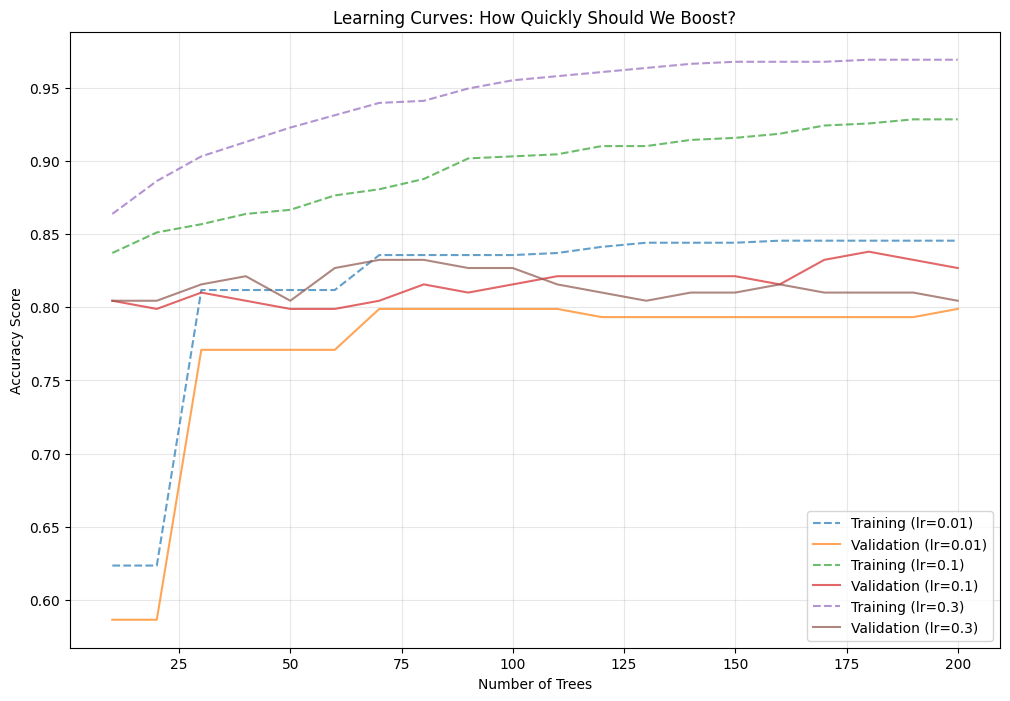


 Best Model Configuration Found!
--------------------------------------------------
Learning Rate: 0.1
Number of Trees: 180
Validation Accuracy: 83.80%

 Overfitting Check:
Training Accuracy: 92.56%
Validation Accuracy: 83.80%

The model is doing much better on training data than validation.


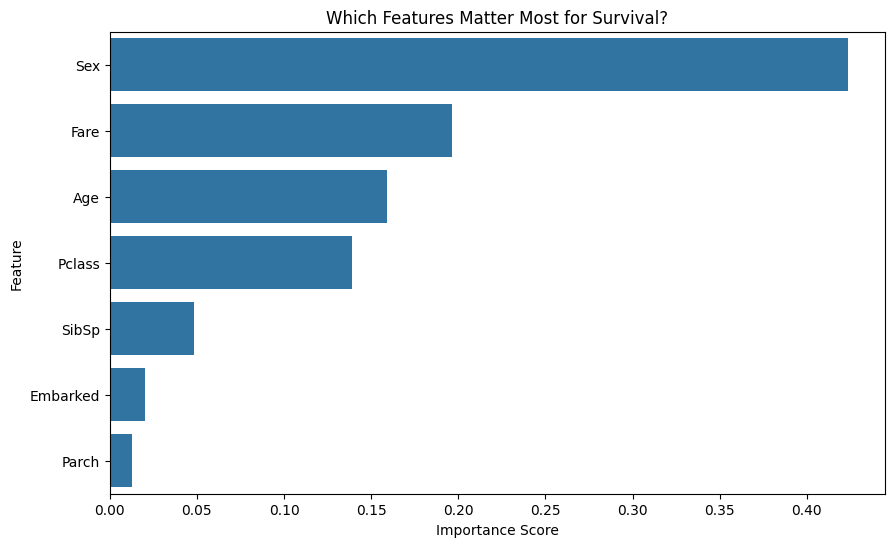


 Final Model Comparison:

Gradient Boosting:
Training Accuracy: 92.56%
Validation Accuracy: 83.80%

Random Forest:
Training Accuracy: 98.03%
Validation Accuracy: 82.12%

Decision Tree:
Training Accuracy: 88.20%
Validation Accuracy: 81.01%

Logistic Regression:
Training Accuracy: 66.01%
Validation Accuracy: 64.80%


c:\Users\EXTECH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\EXTECH\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [16]:
from sklearn.ensemble import GradientBoostingClassifier
def explore_gradient_boosting():
    print("Starting Gradient Boosting Analysis for Titanic Survival Prediction")
    print("=" * 70)
    
    # Let's try different learning speeds
    learning_rates = [0.01, 0.1, 0.3]
    n_estimators = np.arange(10, 210, 10)  # Try 10 to 200 trees
    
    plt.figure(figsize=(12, 8))
    
    for lr in learning_rates:
        train_scores = []
        val_scores = []
        
        print(f"\n Testing learning rate: {lr}")
        
        # Train models with increasing numbers of trees
        for n_trees in n_estimators:
            boost = GradientBoostingClassifier(
                n_estimators=n_trees,
                learning_rate=lr,
                random_state=42
            )
            
            # Train and score the model
            boost.fit(X_train, y_train)
            train_score = boost.score(X_train, y_train)
            val_score = boost.score(X_val, y_val)
            
            train_scores.append(train_score)
            val_scores.append(val_score)
        
        # Plot learning curves
        plt.plot(n_estimators, train_scores, '--', 
                 label=f'Training (lr={lr})', alpha=0.7)
        plt.plot(n_estimators, val_scores, '-', 
                 label=f'Validation (lr={lr})', alpha=0.7)
    
    # Make our plot informative and pretty
    plt.title('Learning Curves: How Quickly Should We Boost?')
    plt.xlabel('Number of Trees')
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Now let's find the best combination
    best_lr = 0
    best_trees = 0
    best_score = 0
    best_model = None
    
    for lr in learning_rates:
        for n_trees in n_estimators:
            boost = GradientBoostingClassifier(
                n_estimators=n_trees,
                learning_rate=lr,
                random_state=42
            )
            boost.fit(X_train, y_train)
            score = boost.score(X_val, y_val)
            
            if score > best_score:
                best_score = score
                best_lr = lr
                best_trees = n_trees
                best_model = boost
    
    print("\n Best Model Configuration Found!")
    print("-" * 50)
    print(f"Learning Rate: {best_lr}")
    print(f"Number of Trees: {best_trees}")
    print(f"Validation Accuracy: {best_score:.2%}")
    
    # Let's check if we're overfitting
    final_train_score = best_model.score(X_train, y_train)
    print("\n Overfitting Check:")
    print(f"Training Accuracy: {final_train_score:.2%}")
    print(f"Validation Accuracy: {best_score:.2%}")
    
    if final_train_score - best_score > 0.05:
        print("\n  Warning: Model might be overfitting!")
        print("The model is doing much better on training data than validation.")
    else:
        print("\n  Good news! Model seems to generalize well.")
        print("Similar performance on training and validation data.")
    
    # Feature importance analysis
    importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': best_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importance, x='Importance', y='Feature')
    plt.title('Which Features Matter Most for Survival?')
    plt.xlabel('Importance Score')
    plt.show()
    
    return best_model

# Let's explore our gradient boosting models
print("Starting gradient boosting exploration...")
gb_model = explore_gradient_boosting()

# Compare with our other models
print("\n Final Model Comparison:")
models = {
    'Gradient Boosting': gb_model,
    'Random Forest': rf_model,
    'Decision Tree': best_tree,
    'Logistic Regression': survival_model
}

for name, model in models.items():
    train_score = model.score(X_train, y_train)
    val_score = model.score(X_val, y_val)
    print(f"\n{name}:")
    print(f"Training Accuracy: {train_score:.2%}")
    print(f"Validation Accuracy: {val_score:.2%}")

8. Evaluating Precision, Recall, and F1-Score for Random Forests
Exercise: Train a random forest classifier on the Titanic dataset and calculate precision, recall, and F1-score. Discuss the trade-offs between these metrics and why they are important in classification tasks.
Goal: Apply evaluation beyond accuracy to a widely used ensemble method.

 Random Forest Performance Analysis

 Performance Metrics:
Metric         Training    Testing
-----------------------------------
Precision       98.03%    82.05%
Recall          98.03%    82.12%
F1-Score        98.03%    82.04%


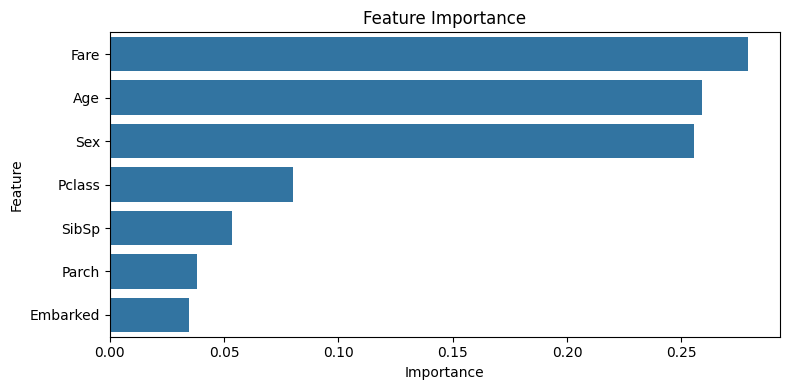

In [20]:
def analyze_random_forest():
    """Evaluate Random Forest performance with key metrics"""
    
    print(" Random Forest Performance Analysis")
    
    # Create and train model
    rf = RandomForestClassifier(
        n_estimators=100, 
        class_weight='balanced',
        random_state=42
    )
    rf.fit(X_train, y_train)
    
    # Get predictions
    y_pred_train = rf.predict(X_train)
    y_pred_test = rf.predict(X_test)
    
    # Calculate all metrics at once
    metrics_train = precision_recall_fscore_support(y_train, y_pred_train, average='weighted')
    metrics_test = precision_recall_fscore_support(y_test, y_pred_test, average='weighted')
    
    # Print results
    print("\n Performance Metrics:")
    print(f"{'Metric':12} {'Training':>10} {'Testing':>10}")
    print("-" * 35)
    for name, train, test in zip(['Precision', 'Recall', 'F1-Score'], 
                                metrics_train[:-1], metrics_test[:-1]):
        print(f"{name:12} {train:>9.2%} {test:>9.2%}")
    
    # Quick visual of feature importance
    importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(8, 4))
    sns.barplot(data=importance, x='Importance', y='Feature')
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()
    
    return rf

# Run analysis
rf_model = analyze_random_forest()

9. ROC Curve and AUC for Gradient Boosting Classifier
Exercise: Implement a gradient boosting classifier and plot the ROC curve. Compute the AUC and interpret how well the model distinguishes survivors from non-survivors.
Goal: Evaluate boosting models with threshold-independent metrics.


Gradient Boosting ROC Analysis
--------------------------------------------------


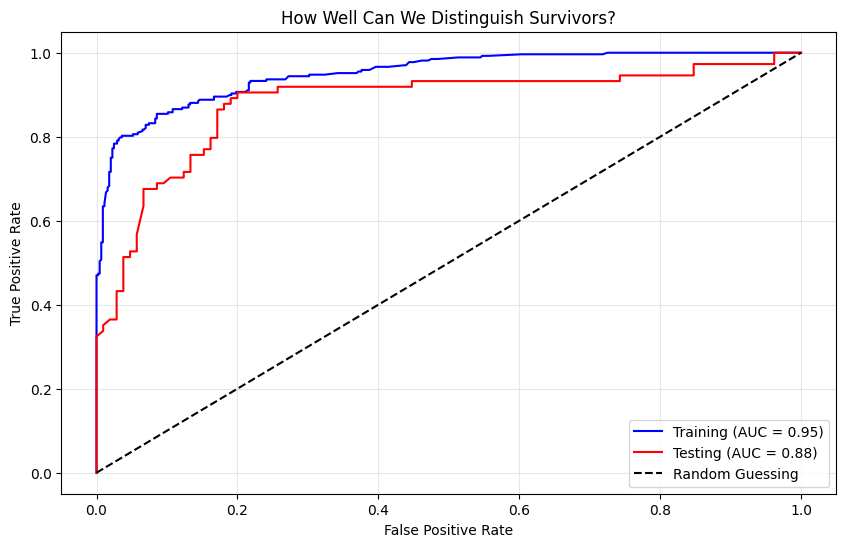


 Model Performance:
Training AUC: 95.03%
Testing AUC:  88.10%

 Great news! Model is very good at ranking survival chances!


In [21]:
def analyze_boosting_roc():
    """Analyze how well our boosted model distinguishes survivors"""
    
    print("Gradient Boosting ROC Analysis")
    print("-" * 50)
    
    # Create and train model
    boost = GradientBoostingClassifier(
        n_estimators=100,  # Good default for small dataset
        learning_rate=0.1, # Moderate learning speed
        random_state=42
    )
    boost.fit(X_train, y_train)
    
    # Get probability predictions
    train_probs = boost.predict_proba(X_train)[:, 1]
    test_probs = boost.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curves
    fpr_train, tpr_train, _ = roc_curve(y_train, train_probs)
    fpr_test, tpr_test, _ = roc_curve(y_test, test_probs)
    
    # Calculate AUC scores
    auc_train = auc(fpr_train, tpr_train)
    auc_test = auc(fpr_test, tpr_test)
    
    # Plot both curves
    plt.figure(figsize=(10, 6))
    plt.plot(fpr_train, tpr_train, 'b-', label=f'Training (AUC = {auc_train:.2f})')
    plt.plot(fpr_test, tpr_test, 'r-', label=f'Testing (AUC = {auc_test:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('How Well Can We Distinguish Survivors?')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Interpret results
    print("\n Model Performance:")
    print(f"Training AUC: {auc_train:.2%}")
    print(f"Testing AUC:  {auc_test:.2%}")
    
    # Give friendly interpretation
    if auc_test > 0.8:
        print("\n Great news! Model is very good at ranking survival chances!")
    elif auc_test > 0.7:
        print("\n Model does a fair job at distinguishing survivors.")
    else:
        print("\n Model struggles to reliably rank survival chances.")
    
    return boost

# Run analysis
gb_model = analyze_boosting_roc()

10. Model Performance Comparison with Different Metrics
Exercise: Compare the performance of SVM, Random Forest, and Gradient Boosting classifiers on the Titanic dataset using cross-validation. Evaluate and compare the models across accuracy, precision, recall, F1-score, and ROC-AUC.
Goal: Identify the best-performing model by balancing multiple evaluation metrics.

Starting Model Comparison Analysis...

Gradient Boosting Performance:
AUC Score:  88.02%
Precision:  81.66%
Recall:     81.56%
F1-Score:   81.28%

Random Forest Performance:
AUC Score:  89.36%
Precision:  82.05%
Recall:     82.12%
F1-Score:   82.04%

Decision Tree Performance:
AUC Score:  83.81%
Precision:  81.28%
Recall:     81.01%
F1-Score:   80.61%

Logistic Regression Performance:
AUC Score:  87.84%
Precision:  79.79%
Recall:     79.89%
F1-Score:   79.80%


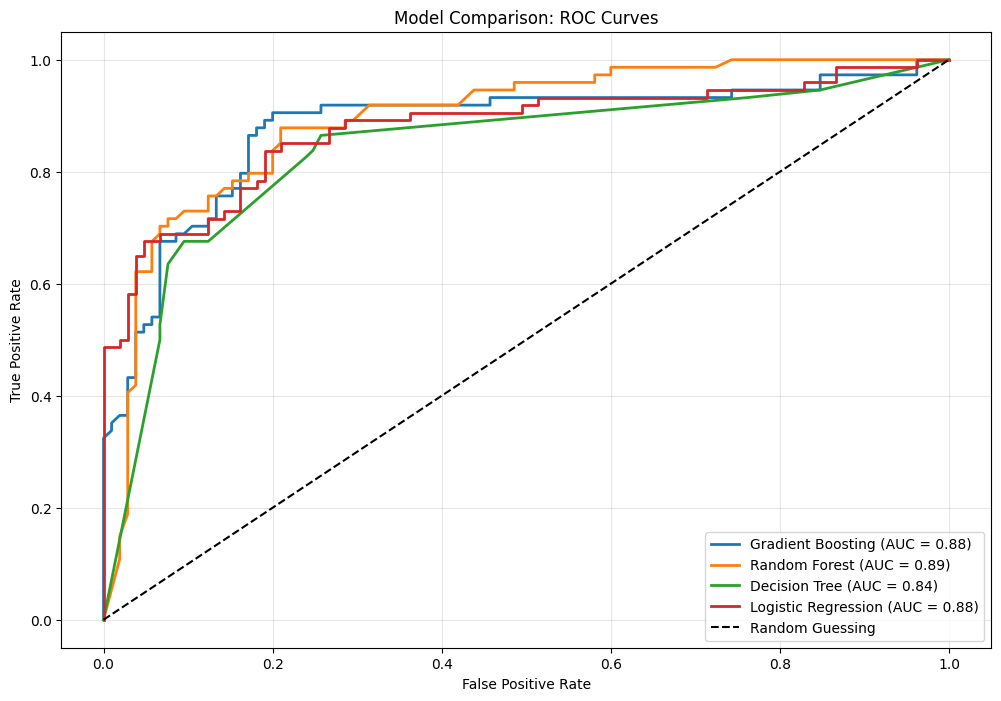

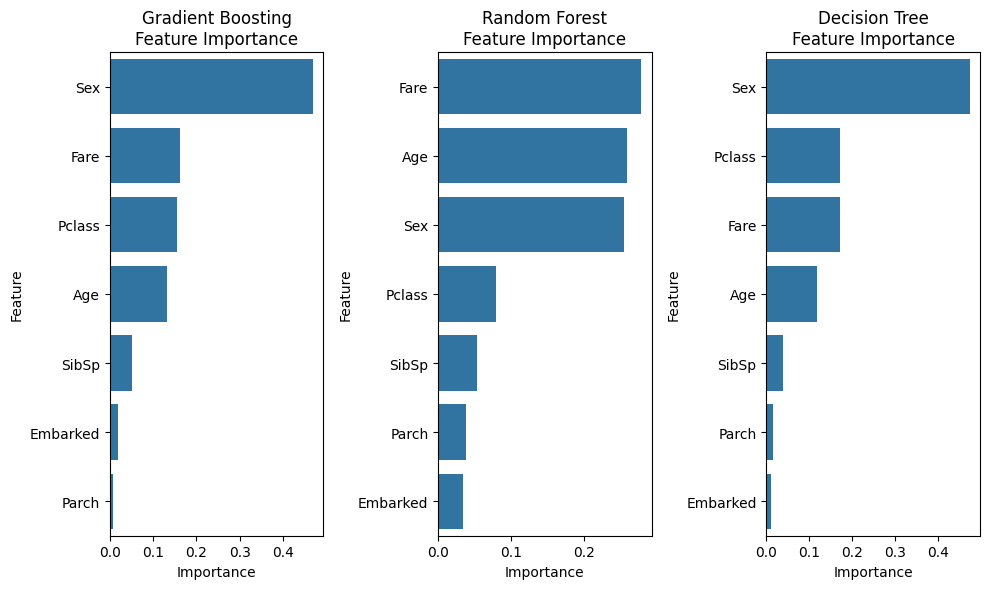

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_model_performance():
    """Compare multiple models using ROC curves and performance metrics"""
    
    # Create and configure the gradient boosting model
    boost = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        random_state=42
    )
    
    # Train model on scaled data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    boost.fit(X_train_scaled, y_train)
    
    # Get predictions for all models
    models = {
        'Gradient Boosting': (boost, X_train_scaled, X_test_scaled),
        'Random Forest': (rf_model, X_train, X_test),
        'Decision Tree': (best_tree, X_train, X_test),
        'Logistic Regression': (survival_model, X_train_scaled, X_test_scaled)
    }
    
    # Plot ROC curves for all models
    plt.figure(figsize=(12, 8))
    
    for name, (model, X_tr, X_te) in models.items():
        # Calculate ROC curves
        y_train_pred = model.predict_proba(X_tr)[:, 1]
        y_test_pred = model.predict_proba(X_te)[:, 1]
        
        fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
        auc_score = auc(fpr_test, tpr_test)
        
        # Plot ROC curve
        plt.plot(fpr_test, tpr_test, 
                label=f'{name} (AUC = {auc_score:.2f})',
                linewidth=2)
        
        # Calculate and store metrics
        y_pred = model.predict(X_te)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_test, y_pred, average='weighted'
        )
        
        print(f"\n{name} Performance:")
        print(f"AUC Score:  {auc_score:.2%}")
        print(f"Precision:  {precision:.2%}")
        print(f"Recall:     {recall:.2%}")
        print(f"F1-Score:   {f1:.2%}")
    
    # Finalize ROC plot
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Model Comparison: ROC Curves')
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Plot feature importance for tree-based models
    tree_models = {
        'Gradient Boosting': boost,
        'Random Forest': rf_model,
        'Decision Tree': best_tree
    }
    
    plt.figure(figsize=(10, 6))
    for i, (name, model) in enumerate(tree_models.items()):
        importance = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        plt.subplot(1, 3, i+1)
        sns.barplot(data=importance, x='Importance', y='Feature')
        plt.title(f'{name}\nFeature Importance')
        plt.tight_layout()
    
    plt.show()
    
    return boost

# Run the analysis
print("Starting Model Comparison Analysis...")
final_model = analyze_model_performance()